In [1]:
import numpy as np

from qibo import Circuit, gates
from qiboml.visualization.visualization import Bloch

First of all, let's plot an empty Bloch sphere.

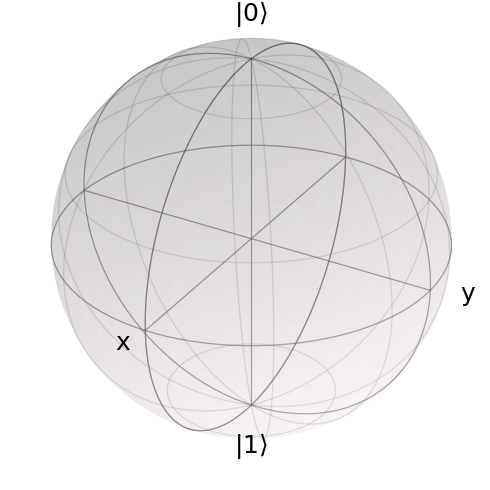

In [2]:
bs = Bloch()
bs.plot()

It is possible to add vectors to the sphere in three different ways: (1) states; (2) vectors; (3) points.
Let's add a state to the sphere.

[Qibo 0.2.18|INFO|2025-06-06 12:37:43]: Using numpy backend on /CPU:0


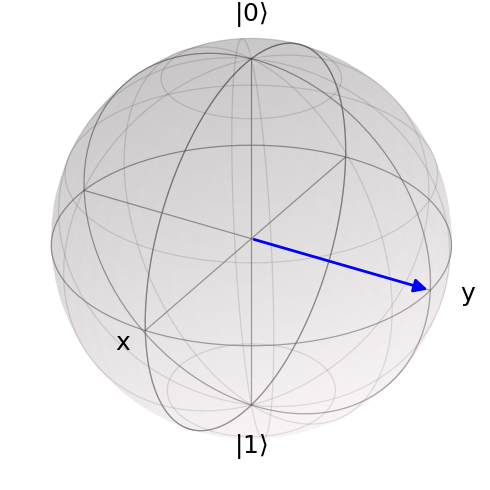

In [3]:
bs.clear()
state = np.array([1/np.sqrt(2), 1/np.sqrt(2)*1j], dtype="complex") 
bs.add_state(state, color="blue")
bs.plot()

Let's add a vector.

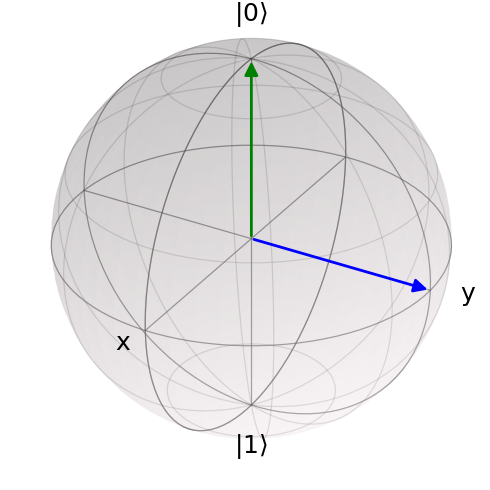

In [4]:
vector = np.array([0, 0, 1]) 
bs.add_vector(vector, color="green")
bs.plot()

Let's add a point.

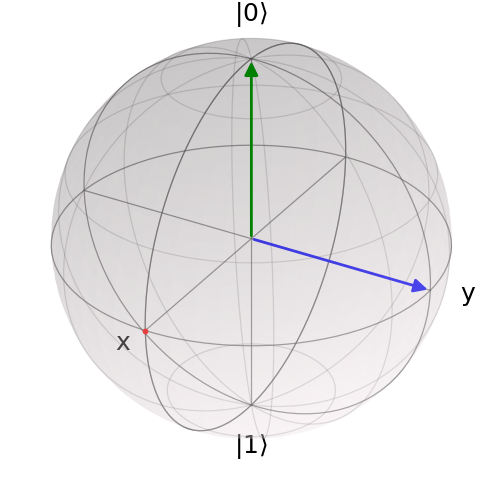

In [5]:
point = np.array([1, 0, 0]) 
bs.add_vector(point, mode="point", color="red")
bs.plot()

Now, let's clear the sphere.

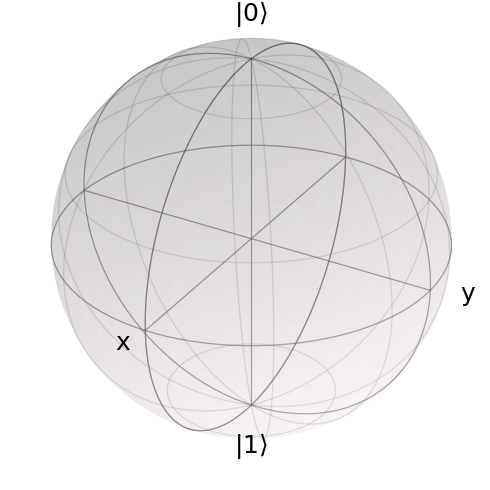

In [6]:
bs.clear()
bs.plot()

It is possible to add multiple elements to the sphere.
Let's add two states.

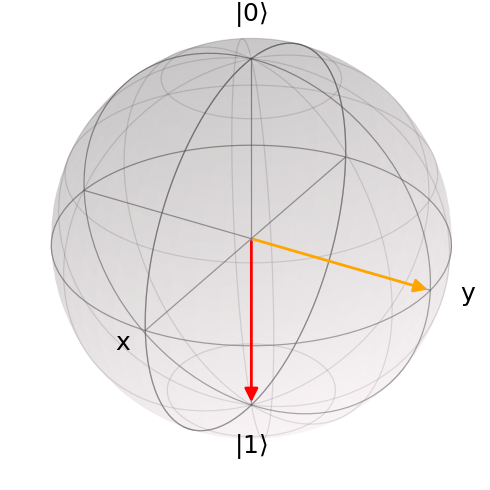

In [7]:
bs.clear()
state = [np.array([1/np.sqrt(2), 1/np.sqrt(2)*1j], dtype="complex"), np.array([0, 1], dtype="complex")]
bs.add_state(states=state, color=["orange", "red"])
bs.plot()

Let's plot a state produced by a qibo circuit.

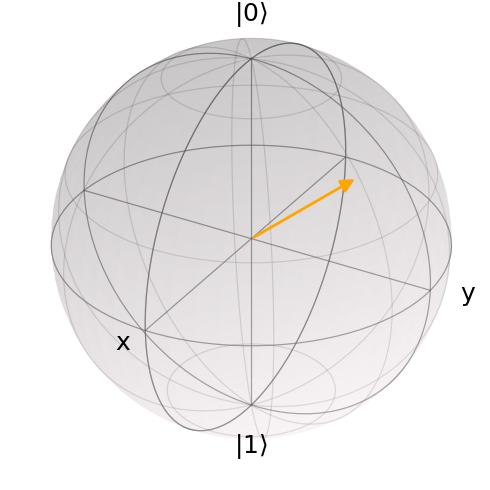

In [8]:
bs.clear()

#--Circuit--
nqubits = 1
layers = 2
circ  = Circuit(nqubits)
for i in range(layers):
    circ.add(gates.RY(q=0, theta=np.random.randn()))
    circ.add(gates.RZ(q=0, theta=np.random.randn()))

state = circ().state()

#--Sphere--
bs.add_state(states=state, color=["orange"])
bs.plot()

Now, let's add the same state to the sphere, but as a point.

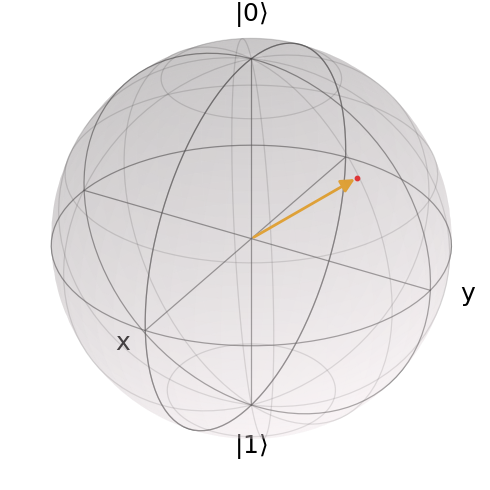

In [9]:
bs.add_vector(state, mode="point", color=["red"])
bs.plot()

Now let's clear the sphere. 

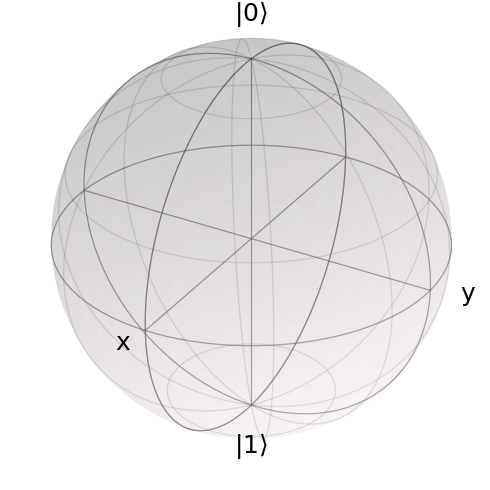

In [10]:
bs.clear()
bs.plot()

Let's see what happens if we try to plot an unnormalized state.

In [11]:
state = np.array([3+1j, 4], dtype="complex")
bs.add_state(state, color="black")
bs.plot()

ValueError: Unnormalized state detected

As expected we get an error. What happens if we try to plot a point/vector that is not on the Bloch sphere?

In [12]:
vector = np.array([1, 1, 1])
bs.add_vector(vector, color="black")
bs.plot()

ValueError: The vector does not lie on the Bloch sphere